In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
# tensorflow supports version of numpy as 1.16.4 (april 21st)
import matplotlib.pyplot as plt

In [2]:
# 1. DATA IMPORT & PREPROCESS
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# train_images: (60000, 28, 28)
# test_images: (10000, 28, 28)

train_images.shape

(60000, 28, 28)

In [7]:
# 2. Normalize data
train_images = train_images / 255
test_images = test_images / 255

In [9]:
# 3. MODEL
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [ ]:
# 4. COMPILE
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(
                  from_logits=True),
              metrics=['accuracy'])

In [12]:
# 5. TRAIN
history = model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
60000/60000 [==============================] - 2s 41us/sample - loss: 1.1479 - acc: 0.7253
Epoch 2/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.4769 - acc: 0.8764
Epoch 3/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.3759 - acc: 0.8968
Epoch 4/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.3362 - acc: 0.9054
Epoch 5/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.3135 - acc: 0.9104


In [13]:
# 6. EVALUATION
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

10000/10000 - 0s - loss: 0.2958 - acc: 0.9138


Text(0.5, 0, 'epoch')

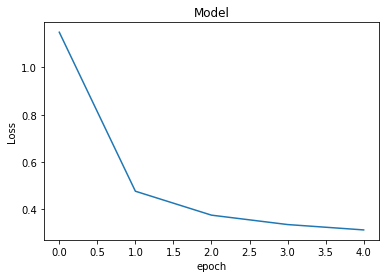

In [16]:
plt.plot(history.history['loss'])
plt.title('Model')
plt.ylabel('Loss')
plt.xlabel('epoch')

In [19]:
# 7: Make predictions
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [36]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(str(predicted_label),
                                100*np.max(predictions_array),
                                str(true_label)),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

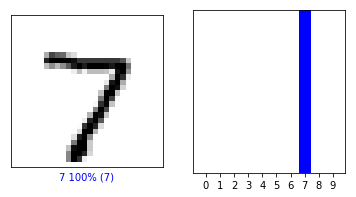

In [37]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

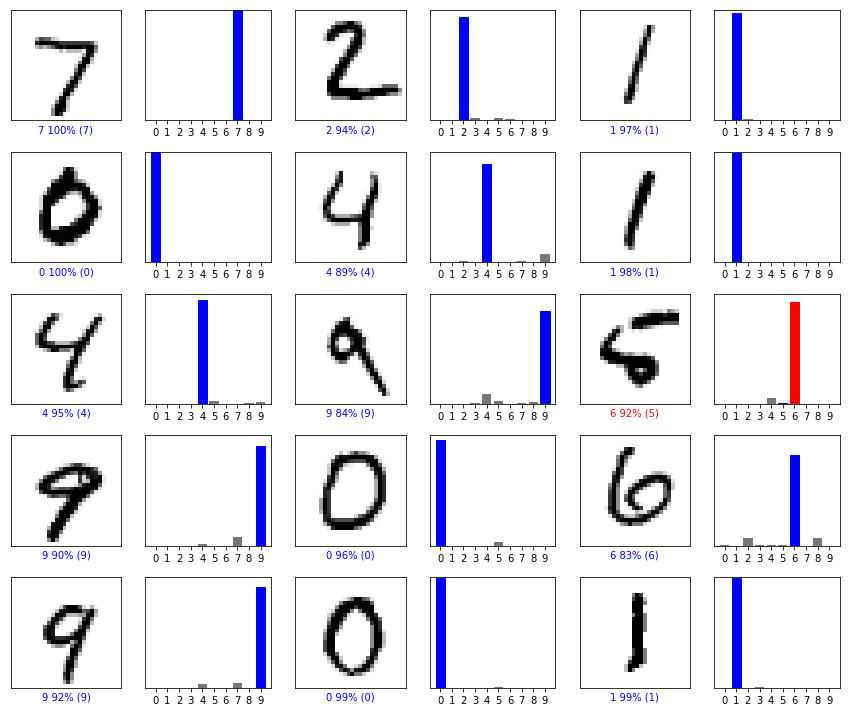

In [38]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()